In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
jan=pd.read_csv('C:\\Users\\rkaushik25.EAD\\Desktop\\Analysis1\\SalesAnalysis\\Sales_Data\\Sales_January_2019.csv')

In [3]:
files=[file for file in os.listdir('C:\\Users\\rkaushik25.EAD\\Desktop\\Analysis1\\SalesAnalysis\\Sales_Data')]

In [4]:
#combining all csv files into one to make a single file
allmonth=pd.DataFrame()

for file in files:
    df=pd.read_csv('C:\\Users\\rkaushik25.EAD\\Desktop\\Analysis1\\SalesAnalysis\\Sales_Data\\'+file)
    allmonth=pd.concat([allmonth,df])

In [5]:
#to make additional columns for information
# adding a month column
allmonth['Month']=allmonth['Order Date'].str[0:2]


In [6]:
remove_nan=allmonth[allmonth.isna().any(axis=1)]

In [7]:
remove_nan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#removing Nan from the data, any- for any presence and all for all in row 
allmonth=allmonth.dropna(how='any')

In [9]:
allmonth=allmonth[allmonth['Month']!='Or']

In [10]:
allmonth['Month']=allmonth['Month'].astype('int32')
allmonth['Quantity Ordered']=allmonth['Quantity Ordered'].astype('float')
allmonth['Price Each']=allmonth['Price Each'].astype('float')


In [11]:
allmonth['sales']=allmonth['Quantity Ordered'] * allmonth['Price Each']

In [12]:
print(allmonth)

      Order ID                     Product  Quantity Ordered  Price Each  \
0       176558        USB-C Charging Cable               2.0       11.95   
2       176559  Bose SoundSport Headphones               1.0       99.99   
3       176560                Google Phone               1.0      600.00   
4       176560            Wired Headphones               1.0       11.99   
5       176561            Wired Headphones               1.0       11.99   
...        ...                         ...               ...         ...   
11681   259353      AAA Batteries (4-pack)               3.0        2.99   
11682   259354                      iPhone               1.0      700.00   
11683   259355                      iPhone               1.0      700.00   
11684   259356      34in Ultrawide Monitor               1.0      379.99   
11685   259357        USB-C Charging Cable               1.0       11.95   

           Order Date                         Purchase Address  Month   sales  
0      

In [13]:
temp=allmonth.groupby('Month').sum()

In [14]:
print(temp)

       Quantity Ordered    Price Each         sales
Month                                              
1               10903.0  1.811768e+06  1.822257e+06
2               13449.0  2.188885e+06  2.202022e+06
3               17005.0  2.791208e+06  2.807100e+06
4               20558.0  3.367671e+06  3.390670e+06
5               18667.0  3.135125e+06  3.152607e+06
6               15253.0  2.562026e+06  2.577802e+06
7               16072.0  2.632540e+06  2.647776e+06
8               13448.0  2.230345e+06  2.244468e+06
9               13109.0  2.084992e+06  2.097560e+06
10              22703.0  3.715555e+06  3.736727e+06
11              19798.0  3.180601e+06  3.199603e+06
12              28114.0  4.588415e+06  4.613443e+06


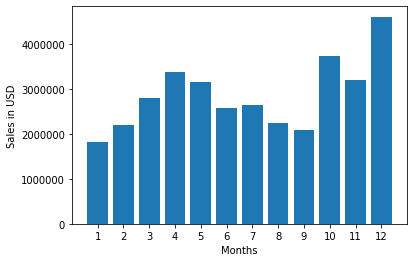

In [15]:
months=range(1,13)
plt.bar(months,temp['sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Months')
plt.show()

In [16]:
#getting citys from address columns
def getcity(x):
    return x.split(',')[1]
def getstate(x):
    return x.split(',')[2].split(' ')[1]
allmonth['City']=allmonth['Purchase Address'].apply(lambda x:getcity(x)+' '+getstate(x))

In [17]:
print(allmonth)

      Order ID                     Product  Quantity Ordered  Price Each  \
0       176558        USB-C Charging Cable               2.0       11.95   
2       176559  Bose SoundSport Headphones               1.0       99.99   
3       176560                Google Phone               1.0      600.00   
4       176560            Wired Headphones               1.0       11.99   
5       176561            Wired Headphones               1.0       11.99   
...        ...                         ...               ...         ...   
11681   259353      AAA Batteries (4-pack)               3.0        2.99   
11682   259354                      iPhone               1.0      700.00   
11683   259355                      iPhone               1.0      700.00   
11684   259356      34in Ultrawide Monitor               1.0      379.99   
11685   259357        USB-C Charging Cable               1.0       11.95   

           Order Date                         Purchase Address  Month   sales  \
0     

In [18]:
temp1=allmonth.groupby('City').sum()

In [19]:
print(temp1)

                   Quantity Ordered    Price Each   Month         sales
City                                                                   
 Atlanta GA                 16602.0  2.779908e+06  104794  2.795499e+06
 Austin TX                  11153.0  1.809874e+06   69829  1.819582e+06
 Boston MA                  22528.0  3.637410e+06  141112  3.661642e+06
 Dallas TX                  16730.0  2.752628e+06  104620  2.767975e+06
 Los Angeles CA             33289.0  5.421435e+06  208325  5.452571e+06
 New York City NY           27932.0  4.635371e+06  175741  4.664317e+06
 Portland ME                 2750.0  4.471893e+05   17144  4.497583e+05
 Portland OR                11303.0  1.860558e+06   70621  1.870732e+06
 San Francisco CA           50239.0  8.211462e+06  315520  8.262204e+06
 Seattle WA                 16553.0  2.733296e+06  104941  2.747755e+06


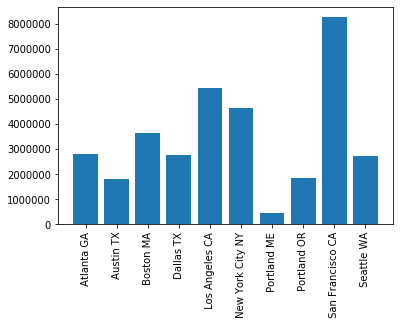

In [20]:
cities=[city for city,df in temp1.groupby('City')]

plt.bar(cities,temp1['sales'])
plt.xticks(cities,rotation='vertical')
plt.show()

In [21]:
allmonth['Order Date']=pd.to_datetime(allmonth['Order Date'])

In [22]:
allmonth['Hour']=allmonth['Order Date'].dt.hour

In [23]:
allmonth['Minute']=allmonth['Order Date'].dt.minute

In [24]:
print(allmonth)

      Order ID                     Product  Quantity Ordered  Price Each  \
0       176558        USB-C Charging Cable               2.0       11.95   
2       176559  Bose SoundSport Headphones               1.0       99.99   
3       176560                Google Phone               1.0      600.00   
4       176560            Wired Headphones               1.0       11.99   
5       176561            Wired Headphones               1.0       11.99   
...        ...                         ...               ...         ...   
11681   259353      AAA Batteries (4-pack)               3.0        2.99   
11682   259354                      iPhone               1.0      700.00   
11683   259355                      iPhone               1.0      700.00   
11684   259356      34in Ultrawide Monitor               1.0      379.99   
11685   259357        USB-C Charging Cable               1.0       11.95   

               Order Date                         Purchase Address  Month  \
0     2019

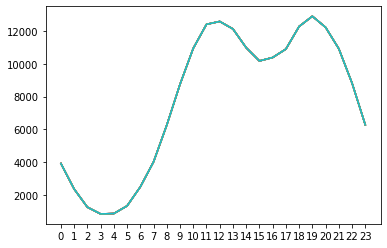

In [25]:
hours=[hour for hour, df in allmonth.groupby('Hour')]
plt.plot(hours,allmonth.groupby(['Hour']).count())
plt.xticks(hours)
plt.show()

In [26]:
temp3=allmonth.groupby('Product').sum()

In [27]:
print(temp3)

                            Quantity Ordered  Price Each   Month       sales  \
Product                                                                        
20in Monitor                          4129.0   451068.99   29336   454148.71   
27in 4K Gaming Monitor                6244.0  2429637.70   44440  2435097.56   
27in FHD Monitor                      7550.0  1125974.93   52558  1132424.50   
34in Ultrawide Monitor                6199.0  2348718.19   43304  2355558.01   
AA Batteries (4-pack)                27635.0    79015.68  145558   106118.40   
AAA Batteries (4-pack)               31017.0    61716.59  146370    92740.83   
Apple Airpods Headphones             15661.0  2332350.00  109477  2349150.00   
Bose SoundSport Headphones           13457.0  1332366.75   94113  1345565.43   
Flatscreen TV                         4819.0  1440000.00   34224  1445700.00   
Google Phone                          5532.0  3315000.00   38305  3319200.00   
LG Dryer                               6

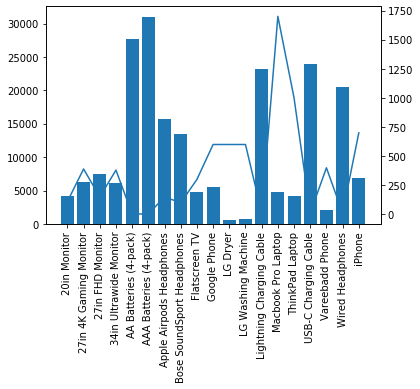

In [28]:
#quantity of each item sold together
prices=allmonth.groupby('Product').mean()['Price Each']
ax1=plt.subplot()
plt1 = plt.twinx()
product=[product for product, df in allmonth.groupby('Product')]
ax1.bar(product,temp3['Quantity Ordered'])
plt1.plot(product,prices)
ax1.set_xticklabels(product,rotation='vertical')

plt.show()


In [29]:
#to find the most selling combination of items
df=allmonth[allmonth['Order ID'].duplicated(keep=False)]
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


      Order ID                     Product  Quantity Ordered  Price Each  \
0       176558        USB-C Charging Cable               2.0       11.95   
2       176559  Bose SoundSport Headphones               1.0       99.99   
3       176560                Google Phone               1.0      600.00   
4       176560            Wired Headphones               1.0       11.99   
5       176561            Wired Headphones               1.0       11.99   
...        ...                         ...               ...         ...   
11681   259353      AAA Batteries (4-pack)               3.0        2.99   
11682   259354                      iPhone               1.0      700.00   
11683   259355                      iPhone               1.0      700.00   
11684   259356      34in Ultrawide Monitor               1.0      379.99   
11685   259357        USB-C Charging Cable               1.0       11.95   

               Order Date                         Purchase Address  Month  \
0     2019

C:\Users\rkaushik25.EAD\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [30]:
temp4=df.groupby('Grouped').sum()

In [31]:
print(temp4)


                                                  Quantity Ordered  \
Grouped                                                              
20in Monitor,20in Monitor                                      6.0   
20in Monitor,27in FHD Monitor                                  4.0   
20in Monitor,34in Ultrawide Monitor                            2.0   
20in Monitor,AA Batteries (4-pack)                            14.0   
20in Monitor,AAA Batteries (4-pack)                            7.0   
...                                                            ...   
iPhone,USB-C Charging Cable                                   25.0   
iPhone,Vareebadd Phone                                         6.0   
iPhone,Wired Headphones                                      752.0   
iPhone,Wired Headphones,Lightning Charging Cable               3.0   
iPhone,iPhone                                                  2.0   

                                                  Price Each  Month  \
Grouped           

In [32]:
temp4=temp4.sort_values(by='Quantity Ordered', ascending=False)

In [33]:
temp5=temp4.head(10)

In [34]:
print(temp5)

                                                    Quantity Ordered  \
Grouped                                                                
iPhone,Lightning Charging Cable                               1822.0   
Google Phone,USB-C Charging Cable                             1785.0   
iPhone,Wired Headphones                                        752.0   
Vareebadd Phone,USB-C Charging Cable                           648.0   
Google Phone,Wired Headphones                                  637.0   
iPhone,Apple Airpods Headphones                                573.0   
Google Phone,Bose SoundSport Headphones                        323.0   
Google Phone,USB-C Charging Cable,Wired Headphones             239.0   
Vareebadd Phone,Wired Headphones                               217.0   
iPhone,Lightning Charging Cable,Wired Headphones               180.0   

                                                    Price Each  Month  \
Grouped                                                       

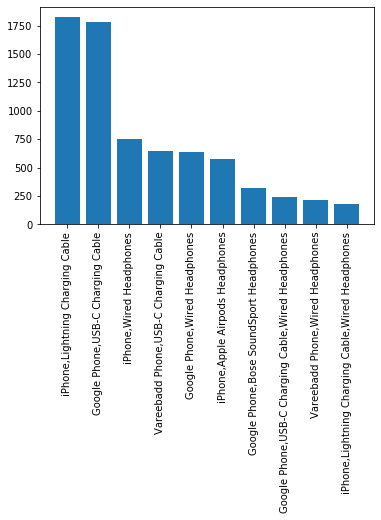

In [35]:
group=[group for group,df in temp5.groupby(['Grouped'],sort=False)]  

plt.bar(group,temp5['Quantity Ordered'])
plt.xticks(rotation='vertical')
plt.show()
